<a href="https://colab.research.google.com/github/BlogLenguaje/WordcloudUsuarioSOF/blob/main/Wordcloud_UsuarioStackoverFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Scraping de Usuario**



Instalamos librerías y lo necesario para hacer  el scrap

In [65]:
!pip install beautifulsoup4

In [66]:
!pip install wordcloud

In [67]:
!pip install requests

In [68]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import requests
from bs4 import BeautifulSoup as bs

In [70]:
r = requests.get("https://es.stackoverflow.com/users/206458/anythingg?tab=tags")
soup = bs(r.content)
print(soup.prettify())

<!DOCTYPE html>
<html class="">
 <head>
  <title>
   Usuario anythingg - Stack Overflow en español
  </title>
  <link href="https://cdn.sstatic.net/Sites/es/Img/favicon.ico?v=9c017e88b153" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow en español" type="application/opensearchdescription+xml"/>
  <link href="https://es.stackoverflow.com/users/206458/anythingg" rel="canonical"/>
  <meta content="website" property="og:type"/>
  <meta content="https://es.stackoverflow.com/users/206458/anythingg" property="og:url"/>
  <meta content="Stack Overflow en español" property="og:site_name"/>
  <meta content="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon@2.png?v=62634cce9d6c" itemprop="image primaryImageOfPage" property="og:image"/>
  

Localizando la tabla


In [71]:
soup.find(id="user-tab-tags").contents[3]


<div class="user-tab-content">
<table class="user-tags">
<tbody>
<tr>
<td><div class="answer-votes" onclick="window.location.href='/search?q=user:206458+[javascript]'" title="Formuló 1 pregunta que no es de wiki con una puntuación total de 5. Proporcionó 40 respuestas que no son de wiki con una puntuación total de 37.">37</div>
<a class="post-tag" href="/search?q=user:206458+[javascript]" title='mostrar todas las publicaciones de este usuario en "javascript"'>javascript</a>
<span class="item-multiplier" title="41 publicaciones en la etiqueta javascript"><span class="item-multiplier-x">×</span> <span class="item-multiplier-count">41</span></span></td>
<td><div class="answer-votes" onclick="window.location.href='/search?q=user:206458+[html5]'" title=" Proporcionó 2 respuestas que no son de wiki con una puntuación total de 3.">3</div>
<a class="post-tag" href="/search?q=user:206458+[html5]" title='mostrar todas las publicaciones de este usuario en "html5"'>html5</a>
<span class="item-mult

Filtramos los tags usados por el usuario y comprobamos que son los que aparecen en la web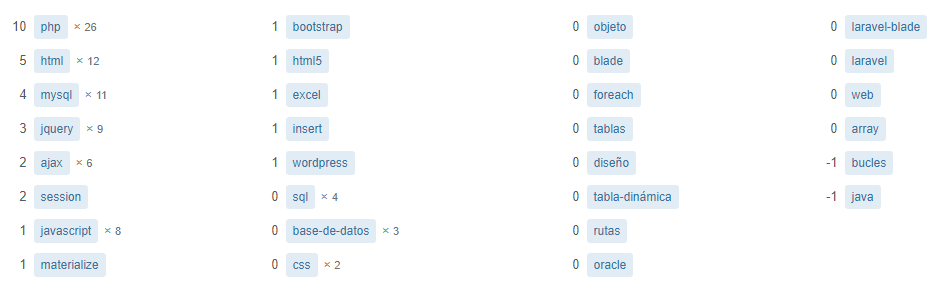

In [72]:
import pandas as pd
table = soup.select("table.user-tags")[0]
columns = table.find("tbody").find_all("a")
columns_names = [c.string for c in columns]
columns_names

['javascript',
 'html5',
 'session',
 'type',
 'php',
 'array',
 'javascript-objeto',
 'bucle-for',
 'html',
 'typescript',
 'fetch',
 'web',
 'jquery',
 'archivo',
 'ssl',
 'whatsapp',
 'ajax',
 'angularjs',
 'https',
 'url',
 'funciones',
 'codeigniter',
 'cache',
 'php7',
 'json',
 'excel',
 'firebase',
 'php5',
 'angular',
 'checkbox',
 'material-ui',
 'iframe',
 'python',
 'ecmascript-6',
 'script',
 'xampp',
 'css',
 'angular8',
 'mysql',
 'nodejs',
 'api',
 'date',
 'phpmyadmin',
 'librería',
 'diccionarios',
 'reactjs',
 'validación',
 'sql',
 '.htaccess',
 'dom',
 'html-tabla',
 'filtro']

In [73]:
from wordcloud import WordCloud, STOPWORDS


Iteramos los tags

In [74]:
wordcloud2 = ' '.join(columns_names)
wordcloud2

'javascript html5 session type php array javascript-objeto bucle-for html typescript fetch web jquery archivo ssl whatsapp ajax angularjs https url funciones codeigniter cache php7 json excel firebase php5 angular checkbox material-ui iframe python ecmascript-6 script xampp css angular8 mysql nodejs api date phpmyadmin librería diccionarios reactjs validación sql .htaccess dom html-tabla filtro'

# **Wordcloud**

In [75]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(wordcloud2)

(-0.5, 1023.5, 799.5, -0.5)

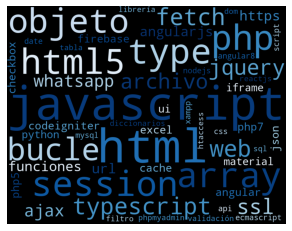

In [76]:

plt.imshow(wordcloud)
plt.axis('off')


# **Nube Wordcloud**

Autorizamos a Colab el acceso a nuestra cuenta de drive

In [77]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [78]:
drive_service = google_authenticate()

para este caso definimos una variable read para poder importar nuestra imagen

In [79]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

Importamos nuestra imagen de drive y especificamos los parámetros que tendrá en mi caso elegí el logo de Python

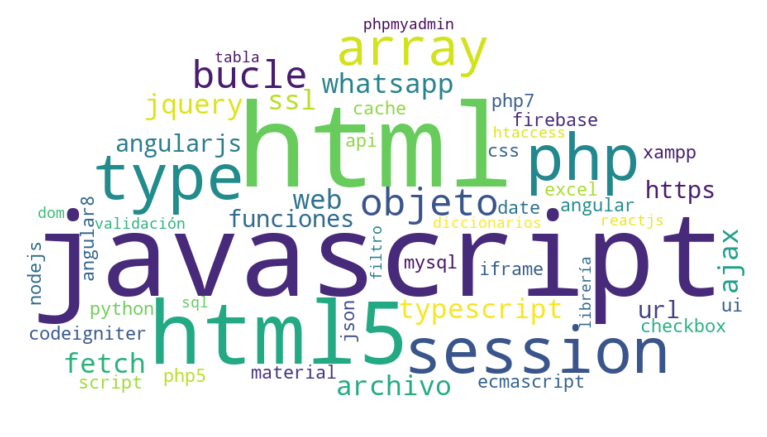

In [80]:
image_file = read_file("13s_Ht_ELeTSKzKWt_YUGMyM2A23MqMar")


image_mask = np.array(Image.open(image_file))


stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=image_mask,
               stopwords=stopwords)
wc.generate(wordcloud2)

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()